# STAT207 Final Project - All Star or Bum?


 1. Albert Chen 
 2. Josh Fajardo 
 3. Shray Srivastava 
 4. Justin Starks 

In [1]:
#Imports here
import pandas as pd 
import numpy as np 

## 1. Introduction

Research Introduction & Motivation

This model can be built to appeal to various audiences. The motivation of creating this model can aid sports analysts in their predictions of NBA All-Stars in the upcoming season, sport betters who want to bet on potential all stars for the upcoming NBA season, and even NBA players to see how well they need to play to become an All-Star. In the context of predicting NBA All-Stars, the "positives" would be the players who are selected as All-Stars, and the "negatives" would be those who are not selected. Since the goal of our model is to predict NBA All-Stars, we believe that those would utilize this model would prefer a model that would be better at classifying positive, or All-Stars, in this case. According to Sara Brown of MIT, "programmers choose a machine learning model to use, supply the data, and let the computer model train itself to find patterns or make predictions" (Machine Learning, explained, 2021). If this is the case would we prefer our model to be better at predicting the wrong outcome? Furthermore a potential user of this model can be a sports better, according to Neil Sahota, a professor at UC Irvine, "AI, with its unparalleled ability to analyze vast datasets and discern patterns beyond human capability, is emerging as the new MVP in this field" (The Game Changer: How AI Is Transforming The World Of Sports Gambling, 2024). 

Research Goal Statement

## 2. Dataset Discussion

In [2]:
per_game_stats = pd.read_csv('NBA_PG_Stats.csv')
per_game_stats.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8


In [3]:
per_game_stats.shape[0]

500

In [4]:
advanced_stats = pd.read_csv('NBA_PG_ADV.csv')
advanced_stats.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
0,1,Precious Achiuwa,PF-C,24,TOT,74,1624,14.6,0.545,0.207,...,NaN,1.2,2.2,3.4,0.102,NaN,-1.7,0.3,-1.4,0.2
1,1,Precious Achiuwa,C,24,TOR,25,437,15.0,0.512,0.276,...,NaN,0.0,0.4,0.4,0.048,NaN,-1.4,-0.2,-1.6,0.0
2,1,Precious Achiuwa,PF,24,NYK,49,1187,14.5,0.564,0.167,...,NaN,1.2,1.8,3.0,0.122,NaN,-1.9,0.5,-1.4,0.2
3,2,Bam Adebayo,C,26,MIA,71,2416,19.8,0.576,0.041,...,NaN,2.9,4.3,7.2,0.144,NaN,0.8,1.7,2.4,2.7
4,3,Ochai Agbaji,SG,23,TOT,78,1641,7.7,0.497,0.487,...,NaN,-0.5,0.6,0.1,0.002,NaN,-3.5,-0.9,-4.4,-1.0


In [5]:
advanced_stats.shape[0]

500

We found these csv files from Sports-Reference.com. This file was download on 4/17/2024, and the player per game stats were found on https://www.basketball-reference.com/leagues/NBA_2024_per_game.html and the advanced statistics were found on https://www.basketball-reference.com/leagues/NBA_2024_advanced.html. In these specific datasets, rows represent NBA players, the NBA uses cameras and Second Spectrum software tracks the movements of every player on the court and the basketball 25 times per second and records player statistics. The dataset could potentially not account all observations. Some players are referred as two-way players, and spend some time in the NBA or G-League. These players might not be included in the dataset. However, this will not likely have a big effect on the dataset because it's unlikely that a two-way player is going to be an All-Star. Our response variable is going to be All-Stars. These players are selected by fans for their fantastic performance throughout the season. The explanatory variables we intend to use are points, rebounds, assist, steals+blocks, Win Shares, and usage. Points are the total number of points a player scores in a game. This is one of the most direct measures of a player's offensive contributions on the court. Points can be scored through field goals, three-point shots, and free throws. Rebounds are recorded whenever a player retrieves the ball after a missed shot that hits the rim or backboard. Rebounds are classified into two categories: Offenseive and Defensive rebounds. An assist is credited to a player who passes the ball to a teammate in a way that leads to a score. This statistic is a key indicator of a player’s ability to distribute the ball and set up teammates for scoring opportunities. A steal occurs when a defensive player legally takes the ball away from an offensive player, which leads to a change in possession. A block is recorded when a defensive player legally deflects an offensive player's shot attempt, preventing the ball from going into the basket. Adding steals and blocks together gives a combined measure of a player’s defensive plays that directly interrupt the opponent’s scoring attempts. Win Shares is an advanced statistic that estimates the number of wins contributed by a player to their team’s total success. It combines various aspects of play (offense and defense) into a single number that quantifies a player's overall impact on winning games. It is calculated using player, team, and league statistics in both offensive and defensive dimensions.Usage rate is an estimate of the percentage of team plays used by a player while they were on the floor. It is a measure of how often a player attempts to score, assists on a basket, or commits a turnover. High usage rates can indicate that a player has a significant role in their team's offense. We chose to focus on these variables because we believe they will help accurately predict All-Stars.

## 3. Dataset Cleaning

Missing Values Detection and Cleaning for Per Game Statitics and Advanced Statistics

For both of our datasets, the inevitable has happened to certain players: they were traded. As a result there are duplicates present in these datasets. However, Basketball-Reference does a fantastic job of mitigating this by adding a 'Tot' observation. This 'Tot' or Total means the total statistics from this player and all teams they have played on throughout the season. 

In [6]:
per_game_stats = per_game_stats[[ 'Player' , 'Tm' , 'PTS' , 'TRB' , 'AST' , 'STL' , 'BLK' ]]
per_game_stats

,Player,Tm,PTS,TRB,AST,STL,BLK
0,Precious Achiuwa,TOT,7.6,6.6,1.3,0.6,0.9
1,Precious Achiuwa,TOR,7.7,5.4,1.8,0.6,0.5
2,Precious Achiuwa,NYK,7.6,7.2,1.1,0.6,1.1
3,Bam Adebayo,MIA,19.3,10.4,3.9,1.1,0.9
4,Ochai Agbaji,TOT,5.8,2.8,1.1,0.6,0.6
...,...,...,...,...,...,...,...
495,Jordan Nwora,TOR,7.9,3.4,1.3,0.6,0.4
496,Royce O'Neale,TOT,7.7,4.8,2.8,0.7,0.6
497,Royce O'Neale,BRK,7.4,4.5,2.8,0.7,0.6
498,Royce O'Neale,PHO,8.1,5.2,2.7,0.9,0.5


In [7]:
per_game_stats = per_game_stats.dropna()
per_game_stats

,Player,Tm,PTS,TRB,AST,STL,BLK
0,Precious Achiuwa,TOT,7.6,6.6,1.3,0.6,0.9
1,Precious Achiuwa,TOR,7.7,5.4,1.8,0.6,0.5
2,Precious Achiuwa,NYK,7.6,7.2,1.1,0.6,1.1
3,Bam Adebayo,MIA,19.3,10.4,3.9,1.1,0.9
4,Ochai Agbaji,TOT,5.8,2.8,1.1,0.6,0.6
...,...,...,...,...,...,...,...
495,Jordan Nwora,TOR,7.9,3.4,1.3,0.6,0.4
496,Royce O'Neale,TOT,7.7,4.8,2.8,0.7,0.6
497,Royce O'Neale,BRK,7.4,4.5,2.8,0.7,0.6
498,Royce O'Neale,PHO,8.1,5.2,2.7,0.9,0.5


In [8]:
advanced_stats = advanced_stats[['Player', 'Tm' , 'WS' , 'USG%']]
advanced_stats

,Player,Tm,WS,USG%
0,Precious Achiuwa,TOT,3.4,15.9
1,Precious Achiuwa,TOR,0.4,21.2
2,Precious Achiuwa,NYK,3.0,14.0
3,Bam Adebayo,MIA,7.2,24.9
4,Ochai Agbaji,TOT,0.1,13.4
...,...,...,...,...
495,Jordan Nwora,TOR,0.4,22.3
496,Royce O'Neale,TOT,3.4,13.9
497,Royce O'Neale,BRK,1.8,13.9
498,Royce O'Neale,PHO,1.7,13.9


In [9]:
advanced_stats = advanced_stats.dropna()
advanced_stats

,Player,Tm,WS,USG%
0,Precious Achiuwa,TOT,3.4,15.9
1,Precious Achiuwa,TOR,0.4,21.2
2,Precious Achiuwa,NYK,3.0,14.0
3,Bam Adebayo,MIA,7.2,24.9
4,Ochai Agbaji,TOT,0.1,13.4
...,...,...,...,...
495,Jordan Nwora,TOR,0.4,22.3
496,Royce O'Neale,TOT,3.4,13.9
497,Royce O'Neale,BRK,1.8,13.9
498,Royce O'Neale,PHO,1.7,13.9


For both of our datasets, the inevitable has happened to certain players: they were traded. As a result there are duplicates present in these datasets. However, Basketball-Reference does a fantastic job of mitigating this by adding a 'Tot' observation. This 'Tot' or Total means the total statistics from this player and all teams they have played on throughout the season. 

In [10]:
per_game_stats.drop_duplicates(subset='Player', keep='first', inplace=True)

per_game_stats

,Player,Tm,PTS,TRB,AST,STL,BLK
0,Precious Achiuwa,TOT,7.6,6.6,1.3,0.6,0.9
3,Bam Adebayo,MIA,19.3,10.4,3.9,1.1,0.9
4,Ochai Agbaji,TOT,5.8,2.8,1.1,0.6,0.6
7,Santi Aldama,MEM,10.7,5.8,2.3,0.7,0.9
8,Nickeil Alexander-Walker,MIN,8.0,2.0,2.5,0.8,0.5
...,...,...,...,...,...,...,...
491,Frank Ntilikina,CHO,1.0,1.2,0.8,0.0,0.0
492,Jusuf Nurki_,PHO,10.9,11.0,4.0,1.1,1.1
493,Jordan Nwora,TOT,7.0,2.9,1.2,0.5,0.3
496,Royce O'Neale,TOT,7.7,4.8,2.8,0.7,0.6


In [11]:
advanced_stats.drop_duplicates(subset = 'Player' , keep = 'first' , inplace = True)
advanced_stats

,Player,Tm,WS,USG%
0,Precious Achiuwa,TOT,3.4,15.9
3,Bam Adebayo,MIA,7.2,24.9
4,Ochai Agbaji,TOT,0.1,13.4
7,Santi Aldama,MEM,2.4,17.9
8,Nickeil Alexander-Walker,MIN,4.3,14.8
...,...,...,...,...
491,Frank Ntilikina,CHO,-0.1,11.2
492,Jusuf Nurki_,PHO,5.8,19.1
493,Jordan Nwora,TOT,0.5,22.4
496,Royce O'Neale,TOT,3.4,13.9


In [12]:
#Merging advanced stats and per_game_stats
final_df = pd.merge(per_game_stats , advanced_stats , on = 'Player' , how = 'outer')
final_df

,Player,Tm_x,PTS,TRB,AST,STL,BLK,Tm_y,WS,USG%
0,Precious Achiuwa,TOT,7.6,6.6,1.3,0.6,0.9,TOT,3.4,15.9
1,Bam Adebayo,MIA,19.3,10.4,3.9,1.1,0.9,MIA,7.2,24.9
2,Ochai Agbaji,TOT,5.8,2.8,1.1,0.6,0.6,TOT,0.1,13.4
3,Santi Aldama,MEM,10.7,5.8,2.3,0.7,0.9,MEM,2.4,17.9
4,Nickeil Alexander-Walker,MIN,8.0,2.0,2.5,0.8,0.5,MIN,4.3,14.8
...,...,...,...,...,...,...,...,...,...,...
377,Frank Ntilikina,CHO,1.0,1.2,0.8,0.0,0.0,CHO,-0.1,11.2
378,Jusuf Nurki_,PHO,10.9,11.0,4.0,1.1,1.1,PHO,5.8,19.1
379,Jordan Nwora,TOT,7.0,2.9,1.2,0.5,0.3,TOT,0.5,22.4
380,Royce O'Neale,TOT,7.7,4.8,2.8,0.7,0.6,TOT,3.4,13.9


After dropping the duplicates from players being traded throughout the season, we ended up with a merged dataframe of all of our explanatory variables. However, after using the dropna command no rows were removed from both datasets. We dropped 118 observations however because they were traded and were duplicated in the datasets. By doing this, it ensures the analysis is based on complete data without any other potential roadblocks that could skew our prediction. Some pros of removing rows with missing values ensures that the analysis is based on complete data, which would later one avoid potential errors that stems from missing values. A con from dropping row with missing values is that it may reduce the sample size and potentially lead to a loss of information, especially if the missing data is not random.

In [13]:
final_df.drop('Tm_y' , axis = 1 , inplace = True)
final_df.rename(columns = {'Tm_x' : 'Tm'} , inplace = True)
final_df

,Player,Tm,PTS,TRB,AST,STL,BLK,WS,USG%
0,Precious Achiuwa,TOT,7.6,6.6,1.3,0.6,0.9,3.4,15.9
1,Bam Adebayo,MIA,19.3,10.4,3.9,1.1,0.9,7.2,24.9
2,Ochai Agbaji,TOT,5.8,2.8,1.1,0.6,0.6,0.1,13.4
3,Santi Aldama,MEM,10.7,5.8,2.3,0.7,0.9,2.4,17.9
4,Nickeil Alexander-Walker,MIN,8.0,2.0,2.5,0.8,0.5,4.3,14.8
...,...,...,...,...,...,...,...,...,...
377,Frank Ntilikina,CHO,1.0,1.2,0.8,0.0,0.0,-0.1,11.2
378,Jusuf Nurki_,PHO,10.9,11.0,4.0,1.1,1.1,5.8,19.1
379,Jordan Nwora,TOT,7.0,2.9,1.2,0.5,0.3,0.5,22.4
380,Royce O'Neale,TOT,7.7,4.8,2.8,0.7,0.6,3.4,13.9


In [43]:
allstars= ["Bam Adebayo", "Giannis Antetokounmpo", "Tyrese Haliburton", "Damian Lillard", "Jayson Tatum", "Paolo Banchero", "Scottie Barnes", "Jaylen Brown", "Jalen Brunson", "Tyrese Maxey", "Donovan Mitchell", "Julius Randle", "Trae Young", "Joel Embiid", "Karl-Anthony Towns", "Kawhi Leonard", "Paul George", "Anthony Edwards", "Anthony Davis", "Stephen Curry", "Devin Booker", "Nikola Joki_", "LeBron James", "Shai Gilgeous-Alexander", "Kevin Durant", "Luka Don_i_"]
final_df['Is All Star'] = final_df['Player'].isin(allstars).replace({True: 'Yes', False: 'No'})
final_df

,Player,Tm,PTS,TRB,AST,STL,BLK,WS,USG%,Is All Star
0,Precious Achiuwa,TOT,7.6,6.6,1.3,0.6,0.9,3.4,15.9,No
1,Bam Adebayo,MIA,19.3,10.4,3.9,1.1,0.9,7.2,24.9,Yes
2,Ochai Agbaji,TOT,5.8,2.8,1.1,0.6,0.6,0.1,13.4,No
3,Santi Aldama,MEM,10.7,5.8,2.3,0.7,0.9,2.4,17.9,No
4,Nickeil Alexander-Walker,MIN,8.0,2.0,2.5,0.8,0.5,4.3,14.8,No
...,...,...,...,...,...,...,...,...,...,...
377,Frank Ntilikina,CHO,1.0,1.2,0.8,0.0,0.0,-0.1,11.2,No
378,Jusuf Nurki_,PHO,10.9,11.0,4.0,1.1,1.1,5.8,19.1,No
379,Jordan Nwora,TOT,7.0,2.9,1.2,0.5,0.3,0.5,22.4,No
380,Royce O'Neale,TOT,7.7,4.8,2.8,0.7,0.6,3.4,13.9,No


In [44]:
final_df['Is All Star'].value_counts()

No     360
Yes     22
Name: Is All Star, dtype: int64

In [45]:
num_yes = final_df[final_df["Is All Star"]=="Yes"]
num_yes

,Player,Tm,PTS,TRB,AST,STL,BLK,WS,USG%,Is All Star
1,Bam Adebayo,MIA,19.3,10.4,3.9,1.1,0.9,7.2,24.9,Yes
10,Giannis Antetokounmpo,MIL,30.4,11.5,6.5,1.2,1.1,13.2,33.0,Yes
24,Paolo Banchero,ORL,22.6,6.9,5.4,0.9,0.6,5.3,29.7,Yes
29,Scottie Barnes,TOR,19.9,8.2,6.1,1.3,1.5,4.3,24.8,Yes
53,Devin Booker,PHO,27.1,4.5,6.9,0.9,0.4,9.2,29.8,Yes
70,Jaylen Brown,BOS,23.0,5.5,3.6,1.2,0.5,5.9,28.9,Yes
75,Jalen Brunson,NYK,28.7,3.6,6.7,0.9,0.2,11.2,32.5,Yes
113,Stephen Curry,GSW,26.4,4.5,5.1,0.7,0.4,7.2,31.3,Yes
115,Anthony Davis,LAL,24.7,12.6,3.5,1.2,2.3,11.8,26.7,Yes
127,Luka Don_i_,DAL,33.9,9.2,9.8,1.4,0.5,12.0,36.0,Yes


In [40]:
Jason = final_df[final_df["Player"]== "Trae Young"]
Jason

,Player,Tm,PTS,TRB,AST,STL,BLK,WS,USG%,Is All Star


Finally, we added our binary response variable column "Is All Star" using who we know made the all star team from this past year.

## 4. Preliminary Analysis

Relationships between the Response Variable and the Explanatory Variables

All of our explanatory variables had a strong association with the response variable as you can see that there is clearly separation between the IQR boxes in all of our box plots. While none of our explanatory variables had "weak relationships" with our response variable, blocks and total rebounds appeared to have the weakest associations/relationships with the response variable as there was less separation between IQR boxes than the rest of the explanatory variables.

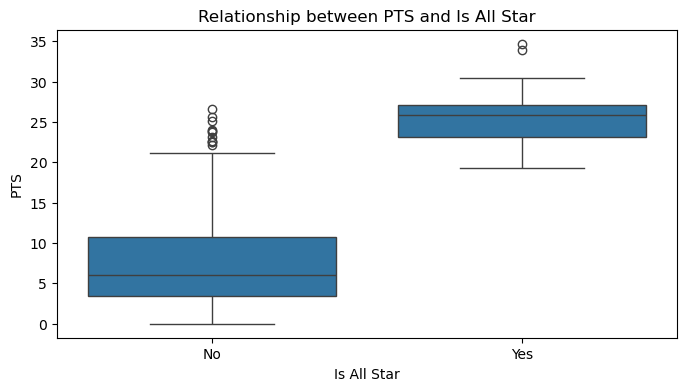

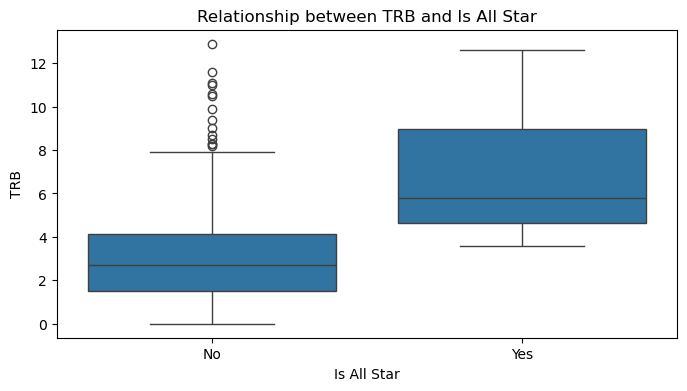

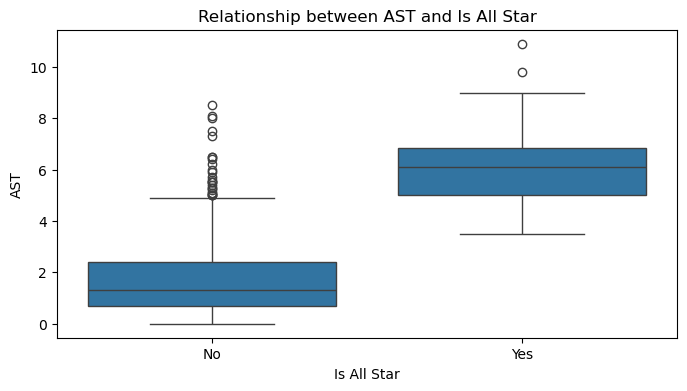

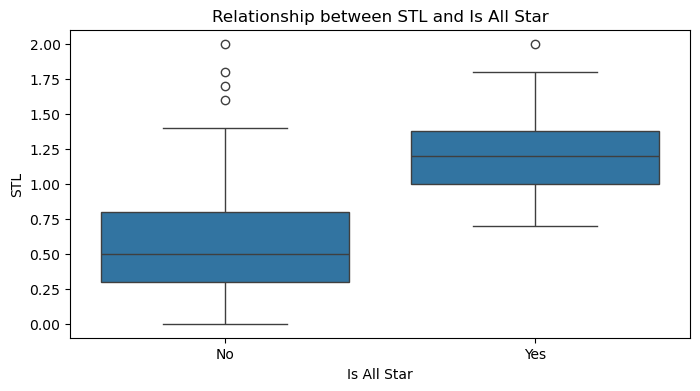

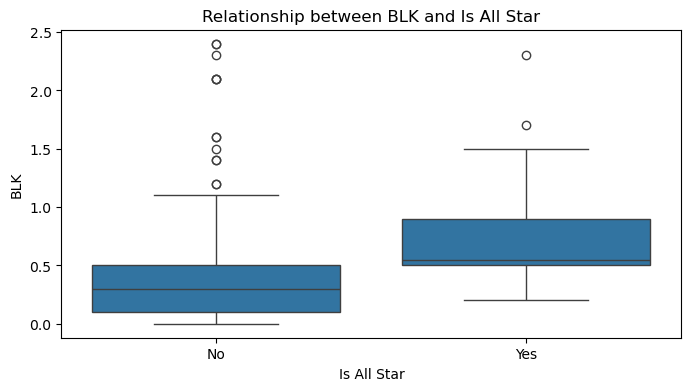

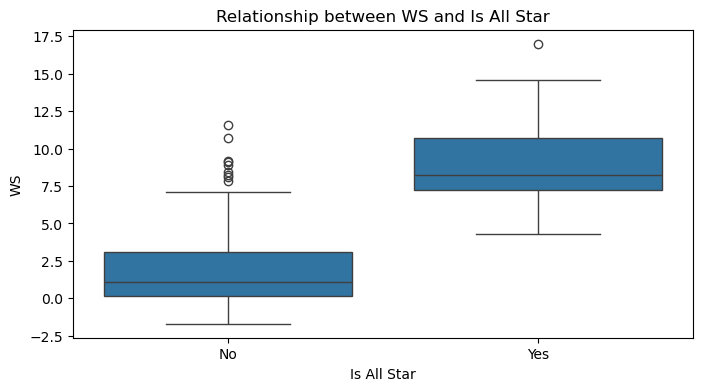

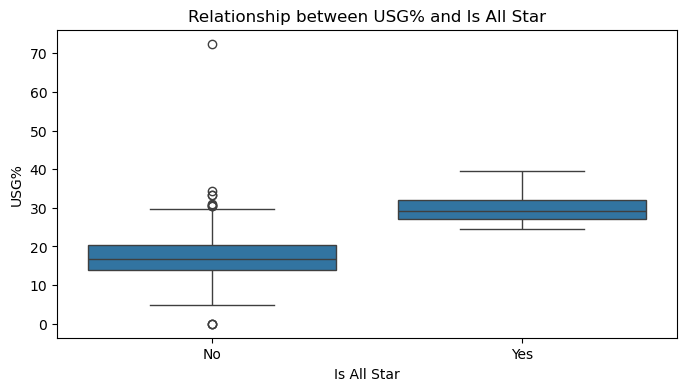

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

exp_variables = ['PTS', 'TRB', 'AST', 'STL', 'BLK', 'WS', 'USG%']
for var in exp_variables:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Is All Star', y=var, data=final_df)
    plt.title(f'Relationship between {var} and Is All Star')
    plt.show()


## 5. Model Data Preprocessing

## 6. Feature Selection with k-Fold Cross-Validation

## 7. Best Model Discussion

## 8. Additional Analysis/Insight

## 9. Conclusion

## References